# Fer2013上训练并显示效果

In [0]:
from data import Fer2013, Jaffe, CK



from keras.utils import to_categorical

expressions, x_train, y_train = Fer2013().gen_train()
expressions, x_valid, y_valid = Fer2013().gen_valid()
# target编码
import numpy as np
y_train = to_categorical(y_train).reshape(y_train.shape[0], -1)
y_valid = to_categorical(y_valid).reshape(y_valid.shape[0], -1)
# 为了统一几个数据集，必须增加一列为0的
y_train = np.hstack((y_train, np.zeros((y_train.shape[0], 1))))
print(y_train.shape)
y_valid = np.hstack((y_valid, np.zeros((y_valid.shape[0], 1))))
print(y_valid.shape)

Using TensorFlow backend.


In [0]:
from model import  CNN3

In [1]:
model = CNN3(input_shape=(48, 48, 1), n_classes=8)

NameError: name 'CNN3' is not defined

In [0]:
from keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint
from keras.optimizers import SGD

sgd = SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
model.compile(optimizer=sgd, loss='categorical_crossentropy', metrics=['accuracy'])
callback = [
    ModelCheckpoint('../models/cnn2_best_weights.h5', monitor='val_acc', verbose=True, save_best_only=True, save_weights_only=True)]
epochs = 200
batch_size = 128

In [0]:
from keras.preprocessing.image import ImageDataGenerator
train_generator = ImageDataGenerator(rotation_range=10, 
                                     width_shift_range=0.05, 
                                     height_shift_range=0.05, 
                                     horizontal_flip=True, 
                                     shear_range=0.2, 
                                     zoom_range=0.2).flow(x_train, y_train, batch_size=batch_size)
valid_generator = ImageDataGenerator().flow(x_valid, y_valid, batch_size=batch_size)

In [0]:
history_fer2013 = model.fit_generator(train_generator, 
                              steps_per_epoch=len(y_train)//batch_size, 
                              epochs=epochs, 
                              validation_data=valid_generator, 
                              validation_steps=len(y_valid)//batch_size, 
                              callbacks=callback)

W0627 12:14:52.406729 140365479012224 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Epoch 1/200
224/224 [==============================] - 47s 209ms/step - loss: 1.8415 - acc: 0.2387 - val_loss: 1.8021 - val_acc: 0.2492

Epoch 00001: val_acc improved from -inf to 0.24916, saving model to ../models/cnn2_best_weights.h5
Epoch 2/200
224/224 [==============================] - 39s 176ms/step - loss: 1.7875 - acc: 0.2546 - val_loss: 1.7344 - val_acc: 0.2996

Epoch 00002: val_acc improved from 0.24916 to 0.29962, saving model to ../models/cnn2_best_weights.h5
Epoch 3/200
224/224 [==============================] - 39s 174ms/step - loss: 1.7363 - acc: 0.2960 - val_loss: 1.6487 - val_acc: 0.3716

Epoch 00003: val_acc improved from 0.29962 to 0.37157, saving model to ../models/cnn2_best_weights.h5
Epoch 4/200
224/224 [==============================] - 39s 174ms/step - loss: 1.6788 - acc: 0.3323 - val_loss: 1.5794 - val_acc: 0.4034

Epoch 00004: val_acc improved from 0.37157 to 0.40335, saving model to ../models/cnn2_best_weights.h5
Epoch 5/200
224/224 [==========================

In [0]:
_, x_test, y_test = Fer2013().gen_test()

100%|██████████| 8/8 [00:00<00:00, 10.46it/s]


In [0]:
pred = model.predict(x_test)
pred = np.argmax(pred, axis=1)
print(pred)
print(np.sum(pred.reshape(-1) == y_test.reshape(-1)) / y_test.shape[0])

[0 0 4 ... 6 3 6]
0.6650877681805517


In [0]:
print(np.max(history_fer2013.history['val_acc']))

0.6714822305864214


# Jaffe上训练并显示效果

In [0]:
import numpy as np
expressions, x, y = Jaffe().gen_train()
from keras.utils import to_categorical
y = to_categorical(y).reshape(y.shape[0], -1)
# 为了统一几个数据集，必须增加一列为0的
y = np.hstack((y, np.zeros((y.shape[0], 1))))

100%|██████████| 8/8 [00:00<00:00, 167.59it/s]


In [0]:
from sklearn.model_selection import train_test_split
# 划分训练集验证集
x_train, x_valid, y_train, y_valid = train_test_split(x, y, test_size=0.2, random_state=2019)
print(x_train.shape, y_train.shape)

(170, 48, 48, 1) (170, 8)


In [0]:
from keras.preprocessing.image import ImageDataGenerator
train_generator = ImageDataGenerator(rotation_range=10, 
                                     width_shift_range=0.05, 
                                     height_shift_range=0.05, 
                                     horizontal_flip=True, 
                                     shear_range=0.2, 
                                     zoom_range=0.2).flow(x_train, y_train, batch_size=32)
valid_generator = ImageDataGenerator().flow(x_valid, y_valid, batch_size=32)

In [0]:
model = CNN3()

In [0]:
from keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint

sgd = SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
model.compile(optimizer=sgd, loss='categorical_crossentropy', metrics=['accuracy'])
callback = [
    ModelCheckpoint('../models/cnn3_best_weights.h5', monitor='val_acc', verbose=True, save_best_only=True, save_weights_only=True)]
epochs = 200
batch_size = 32

In [0]:
history_jaffe = model.fit_generator(train_generator, steps_per_epoch=len(y_train)//batch_size, epochs=epochs, validation_data=valid_generator, validation_steps=len(y_valid)//batch_size, callbacks=callback)

Epoch 1/200
5/5 [==============================] - 2s 476ms/step - loss: 2.0815 - acc: 0.1062 - val_loss: 2.0625 - val_acc: 0.1562

Epoch 00001: val_acc improved from -inf to 0.15625, saving model to ../models/cnn3_best_weights.h5
Epoch 2/200
5/5 [==============================] - 0s 37ms/step - loss: 2.0550 - acc: 0.1512 - val_loss: 2.0485 - val_acc: 0.0909

Epoch 00002: val_acc did not improve from 0.15625
Epoch 3/200
5/5 [==============================] - 0s 33ms/step - loss: 2.0260 - acc: 0.1283 - val_loss: 1.9964 - val_acc: 0.1250

Epoch 00003: val_acc did not improve from 0.15625
Epoch 4/200
5/5 [==============================] - 0s 34ms/step - loss: 1.9657 - acc: 0.1577 - val_loss: 2.1454 - val_acc: 0.0909

Epoch 00004: val_acc did not improve from 0.15625
Epoch 5/200
5/5 [==============================] - 0s 31ms/step - loss: 2.0380 - acc: 0.1434 - val_loss: 2.0010 - val_acc: 0.0938

Epoch 00005: val_acc did not improve from 0.15625
Epoch 6/200
5/5 [============================

# CK+上训练并显示效果

In [0]:
model = CNN3()

In [0]:
import numpy as np
expr, x, y = CK().gen_train()
from keras.utils import to_categorical
y = to_categorical(y).reshape(y.shape[0], -1)

100%|██████████| 8/8 [00:00<00:00, 33.94it/s]


In [0]:
from sklearn.model_selection import train_test_split
# 划分训练集验证集
x_train, x_valid, y_train, y_valid = train_test_split(x, y, test_size=0.2, random_state=2019)
print(x_train.shape, y_train.shape)

(784, 48, 48, 1) (784, 8)


In [0]:
from keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint

sgd = SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
model.compile(optimizer=sgd, loss='categorical_crossentropy', metrics=['accuracy'])
callback = [
    ModelCheckpoint('../models/cnn3_best_weights.h5', monitor='val_acc', verbose=True, save_best_only=True, save_weights_only=True)]
epochs = 200
batch_size = 64

In [0]:
from keras.preprocessing.image import ImageDataGenerator
train_generator = ImageDataGenerator(rotation_range=10, 
                                     width_shift_range=0.05, 
                                     height_shift_range=0.05, 
                                     horizontal_flip=True, 
                                     shear_range=0.2, 
                                     zoom_range=0.2).flow(x_train, y_train, batch_size=32)
valid_generator = ImageDataGenerator().flow(x_valid, y_valid, batch_size=32)

In [0]:
history_ck = model.fit_generator(train_generator, steps_per_epoch=len(y_train)//batch_size, epochs=epochs, validation_data=valid_generator, validation_steps=len(y_valid)//batch_size, callbacks=callback)

# 绘制损失与准确率图像

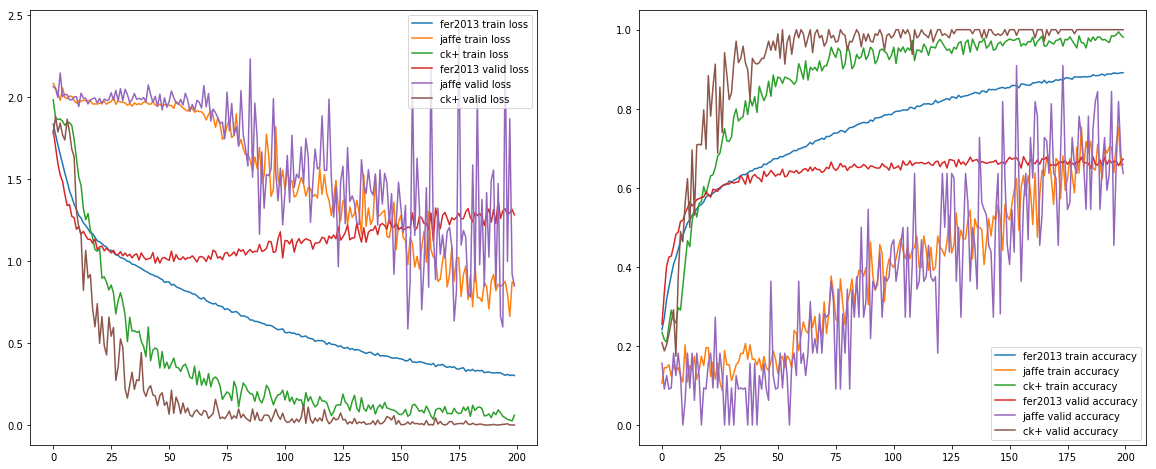

In [0]:
import matplotlib.pyplot as plt

# 损失
plt.figure(figsize=(20, 8))
plt.subplot(1, 2, 1)
plt.plot(np.arange(len(history_fer2013.history['loss'])), history_fer2013.history['loss'], label='fer2013 train loss')
plt.plot(np.arange(len(history_jaffe.history['loss'])), history_jaffe.history['loss'], label='jaffe train loss')
plt.plot(np.arange(len(history_ck.history['loss'])), history_ck.history['loss'], label='ck+ train loss')

plt.plot(np.arange(len(history_fer2013.history['val_loss'])), history_fer2013.history['val_loss'], label='fer2013 valid loss')
plt.plot(np.arange(len(history_jaffe.history['val_loss'])), history_jaffe.history['val_loss'], label='jaffe valid loss')
plt.plot(np.arange(len(history_ck.history['val_loss'])), history_ck.history['val_loss'], label='ck+ valid loss')
plt.legend(loc='best')
# 准确率
plt.subplot(1, 2, 2)
plt.plot(np.arange(len(history_fer2013.history['acc'])), history_fer2013.history['acc'], label='fer2013 train accuracy')
plt.plot(np.arange(len(history_jaffe.history['acc'])), history_jaffe.history['acc'], label='jaffe train accuracy')
plt.plot(np.arange(len(history_ck.history['acc'])), history_ck.history['acc'], label='ck+ train accuracy')

plt.plot(np.arange(len(history_fer2013.history['val_acc'])), history_fer2013.history['val_acc'], label='fer2013 valid accuracy')
plt.plot(np.arange(len(history_jaffe.history['val_acc'])), history_jaffe.history['val_acc'], label='jaffe valid accuracy')
plt.plot(np.arange(len(history_ck.history['val_acc'])), history_ck.history['val_acc'], label='ck+ valid accuracy')
plt.legend(loc='best')
plt.savefig('loss.png')
plt.show()

# 评估模型泛化能力

In [0]:
from model import CNN3
model = CNN3()
model.load_weights('../models/cnn2_best_weights.h5')


In [0]:
from data import Jaffe, CK

_, x_jaffe, y_jaffe = Jaffe().gen_train()
_, x_ck, y_ck = CK().gen_train()
jaffe_pred = model.predict(x_jaffe)
ck_pred = model.predict(x_ck)

print(np.sum(np.argmax(jaffe_pred, axis=1) == y_jaffe) / y_jaffe.shape[0])
print(np.sum(np.argmax(ck_pred, axis=1) == y_ck) / y_ck.shape[0])

100%|██████████| 8/8 [00:00<00:00, 20.89it/s]


0.4694835680751174
0.6309887869520897


# 特征可视化

In [0]:
from model import CNN3
model = CNN3()
model.load_weights('../models/cnn3_best_weights.h5')

In [0]:
print(model.summary())

In [0]:
def get_feature_map(model, layer_index, channels, input_img):
    from keras import backend as K
    layer = K.function([model.layers[0].input], [model.layers[layer_index].output])
    feature_map = layer([input_img])[0]
    import matplotlib.pyplot as plt
    plt.figure(figsize=(20, 8))
    for i in range(channels):
        img = feature_map[:, :, :, i]
        plt.subplot(4, 8, i+1)
        plt.imshow(img[0], cmap='gray')
    plt.savefig('rst.png')
    plt.show()
        

In [0]:
import cv2
img = cv2.cvtColor(cv2.imread('../data/demo.jpg'), cv2.cv2.COLOR_BGR2GRAY)
img.shape = (1, 48, 48, 1)

In [0]:
get_feature_map(model, 4, 32, img)

In [0]:
get_feature_map(model, 9, 32, img)